# 株式リターンの分布推定

株価の推移は様々な要因に左右されるので、一般に予測するのは難しい. しかし、全く予測不可能というわけではなく、ピンポイントに増減が予測できないとしても、だいたいこれくらいに収まるだろうという範囲(ばらつき)は予測することができる. 株式運用の世界では、予測のための値として、収益率の平均値をリターンとして、標準偏差をリスクとして定義する. そして、ある確率でこの値を取るとされる分布を定義することができ、これをリターン分布と呼ぶ. つまり、分布を推定できると、ある年の値動きをある程度予測できることができる. 

使用するデータ: Apple (2021/08/18~2022/08/18)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353104,92229700
1,2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544434,86326000
2,2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882553,86960300
3,2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364227,60549600
4,2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800
...,...,...,...,...,...,...,...
248,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200
249,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400
250,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700
251,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100


In [3]:
#Adj Close, Volumeを消去
del df['Adj Close']
del df['Volume']

In [4]:
#前日比率を計算するために一日ずらした列を作成
for i in ['Open','High','Low','Close']:
    df[i + '(Previous Day)'] = df[i].shift(1)

#前日比率を計算
df['Previous Day Ratio'] = df['Close']/df['Close(Previous Day)']
df.head()

,Date,Open,High,Low,Close,Open(Previous Day),High(Previous Day),Low(Previous Day),Close(Previous Day),Previous Day Ratio
0,2021-08-17,150.229996,151.679993,149.089996,150.190002,NaN,NaN,NaN,NaN,NaN
1,2021-08-18,149.800003,150.720001,146.149994,146.360001,150.229996,151.679993,149.089996,150.190002,0.974499
2,2021-08-19,145.029999,148.000000,144.500000,146.699997,149.800003,150.720001,146.149994,146.360001,1.002323
3,2021-08-20,147.440002,148.500000,146.779999,148.190002,145.029999,148.000000,144.500000,146.699997,1.010157
4,2021-08-23,148.309998,150.190002,147.889999,149.710007,147.440002,148.500000,146.779999,148.190002,1.010257


価格変動の大きさを示すボラティリティの計算を行う. そして、終値と比較することで、対応関係を理解する.

In [5]:
#True Range(真の値幅)の計算
df['High - Low'] = df['High'] - df['Low']
df['High - Close(Previous Day)'] = df['High'] - df['Close(Previous Day)']
df['Close(Previous Day) - Low'] = df['Close(Previous Day)'] - df['Low']
df['True Range'] = df[['High - Low','High - Close(Previous Day)','Close(Previous Day) - Low']].max(axis=1)

#Typical Price
df['Typical Price'] = (df['High']+df['Low']+df['Close'])/3

#Volarityの計算
df['Volarity'] = df['True Range']/df['Typical Price']

# 欠損処理
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Open(Previous Day),High(Previous Day),Low(Previous Day),Close(Previous Day),Previous Day Ratio,High - Low,High - Close(Previous Day),Close(Previous Day) - Low,True Range,Typical Price,Volarity
1,2021-08-18,149.800003,150.720001,146.149994,146.360001,150.229996,151.679993,149.089996,150.190002,0.974499,4.570007,0.529999,4.040008,4.570007,147.743332,0.030932
2,2021-08-19,145.029999,148.000000,144.500000,146.699997,149.800003,150.720001,146.149994,146.360001,1.002323,3.500000,1.639999,1.860001,3.500000,146.399999,0.023907
3,2021-08-20,147.440002,148.500000,146.779999,148.190002,145.029999,148.000000,144.500000,146.699997,1.010157,1.720001,1.800003,-0.080002,1.800003,147.823334,0.012177
4,2021-08-23,148.309998,150.190002,147.889999,149.710007,147.440002,148.500000,146.779999,148.190002,1.010257,2.300003,2.000000,0.300003,2.300003,149.263336,0.015409
5,2021-08-24,149.449997,150.860001,149.149994,149.619995,148.309998,150.190002,147.889999,149.710007,0.999399,1.710007,1.149994,0.560013,1.710007,149.876663,0.011409


In [6]:
#必要な列はDate, Close, Previous Day Ratio, Volarity
df = df[['Date','Close','Previous Day Ratio','Volarity']]
df

,Date,Close,Previous Day Ratio,Volarity
1,2021-08-18,146.360001,0.974499,0.030932
2,2021-08-19,146.699997,1.002323,0.023907
3,2021-08-20,148.190002,1.010157,0.012177
4,2021-08-23,149.710007,1.010257,0.015409
5,2021-08-24,149.619995,0.999399,0.011409
...,...,...,...,...
248,2022-08-11,168.490005,0.995568,0.016546
249,2022-08-12,172.100006,1.021426,0.021492
250,2022-08-15,173.190002,1.006334,0.011816
251,2022-08-16,173.029999,0.999076,0.011863


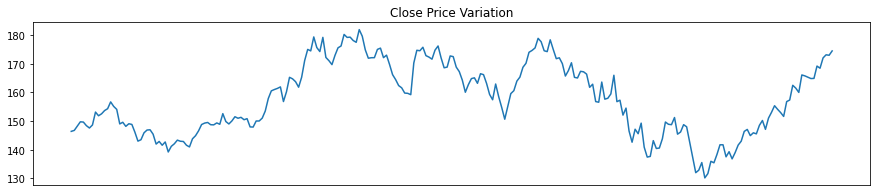

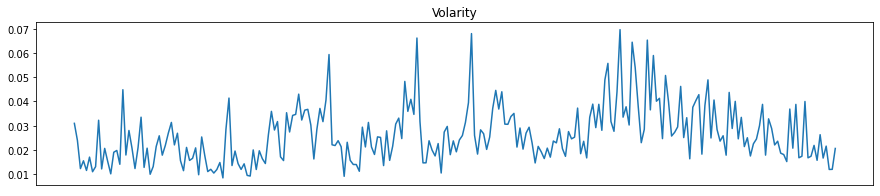

In [12]:
# グラフ化
plt.figure(figsize = (15, 3))
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Variation')
plt.xticks([])
plt.show()

plt.figure(figsize = (15, 3))
plt.plot(df['Date'], df['Volarity'])
plt.title('Volarity')
plt.xticks([])
plt.show()

In [21]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 2.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import seaborn as sns

リターン分布を表示する.

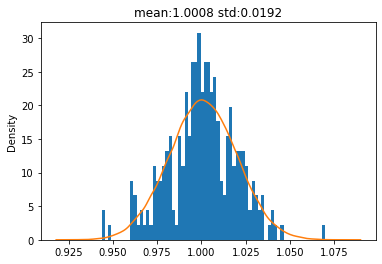

In [27]:
plt.hist(df['Previous Day Ratio'],bins=70,density=True,label="True Data")

#リターン分布が正規分布に従うと仮定して、平均と標準偏差を求める
mu,sigma = norm.fit(df['Previous Day Ratio'])

sample = np.random.normal(mu,sigma,100000)
sns.kdeplot(sample, label = 'Expected Normal Distribution')
plt.title('mean:{} std:{}'.format(round(mu,4),round(sigma,4)))
plt.show()

In [20]:
sample

array([0.96181024, 0.98211416, 1.00071355, ..., 1.00773036, 0.99215556,
       0.99072186])